<a href="https://colab.research.google.com/gist/qbeer/07eb98879a555a676b6da86ea8cd7f9e/hw_6_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Implement a linear model
return the weight parameters w = (w1, w2, ... , wP) and the intercept parameter w0 separately where:

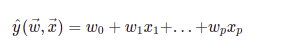

* check your returned coefficients with the built in `LinearRegression` class from the sklearn library, they should be within tolerance 1e-6 to each other

* use a generated regression dataset from `sklearn.dataset import make_regression` API with parameters `n_samples=1000` and `n_features=20`



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
import seaborn as sns

import sys
import os

In [101]:
from sklearn.datasets import make_regression             #for generated dataset

from sklearn.preprocessing import StandardScaler         #DO NOT EVER FORGET THIS!
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression        
from sklearn.linear_model import Lasso, Ridge        
from sklearn.linear_model import LogisticRegression     
from sklearn.model_selection import KFold

In [3]:
data0_X, data0_Y = make_regression(n_samples=1000, n_features=20)

In [4]:
display(data0_X.shape, data0_Y.shape) #seems fine

(1000, 20)

(1000,)

1. Its in a numpy array format
2. It has 20 features, thus I don't have to pop index columns, remove NaNs...
3. I HAVE TO BUILD MINE....

Guide links:

https://in.springboard.com/blog/linear-regression-model/

https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a

So the second gives a really straightforward description with OLS and says that there could a gradient to be used

In [36]:
def cost_function(X, Y, W):
    """
    Calculates the cost
        INPUT:
        X: N x M shaped dataset
        Y: N x 1 shaped dataset
        W: starter coefficents
    """
    m = len(Y)
    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
    return J


def batch_gradient_descent(X, Y, W, alpha, iterations):
    """
    Calculates multivariate linear regression with starter W_1,W_2,... initial guess
    
    Does StandardScaling of the data
    
    INPUT:
        X: N x M shaped dataset
        Y: N x 1 shaped dataset
        W: starter coefficents
        alpha: used for gradient
        iterations: number of iterations
    
    """
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        if( (iteration+1) % 10 == 0):
            sys.stdout.write('\r' + str(iteration+1) + '/' + str(iterations))
            sys.stdout.flush()

        # Hypothesis Values
        h = X.dot(W)

        # Difference b/w Hypothesis and Actual Y
        loss = h - Y

        # Gradient Calculation
        gradient = X.T.dot(loss) / m

        # Changing Values of B using Gradient
        W = W - alpha * gradient

        # New Cost Value
        cost = cost_function(X, Y, W)
        cost_history[iteration] = cost

    return W, cost_history

In [37]:
W = np.zeros(data0_X_train.shape[1])
alpha = 0.005
iter_ = 20000
newW, cost_history = batch_gradient_descent(data0_X_train,  data0_Y_train, W, alpha, iter_)

20000/20000

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(data0_X, data0_Y)
coeffs, intercept = lin_reg.coef_ , lin_reg.intercept_
display(coeffs, intercept)
display(newW)

array([ 5.96466485e+00,  1.05587608e-13,  3.94582874e-15,  9.41916642e-15,
        2.39375151e-14,  5.80152244e+01,  2.53000650e+01,  7.38394978e+01,
        3.69863636e+01,  3.57142342e+01,  2.40827176e+01,  5.50393462e+01,
        2.07561904e-16,  6.11804444e+01,  6.09323059e-14,  2.76537573e-15,
       -1.98780885e-14, -2.57956756e-14,  7.78798227e-14,  4.43085922e+01])

-8.881784197001252e-16

array([ 5.96466485e+00, -4.10609092e-14,  2.02886682e-13, -8.69959848e-14,
        1.12447846e-13,  5.80152244e+01,  2.53000650e+01,  7.38394978e+01,
        3.69863636e+01,  3.57142342e+01,  2.40827176e+01,  5.50393462e+01,
       -4.85467970e-14,  6.11804444e+01, -2.09877740e-13,  2.19126850e-13,
       -1.27788938e-14,  1.77960359e-13, -1.77423342e-13,  4.43085922e+01])

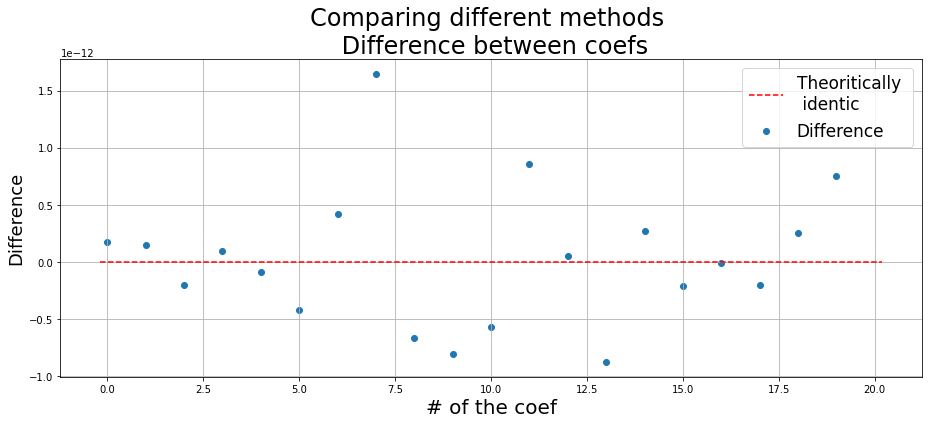

In [44]:
fig,ax = plt.subplots(1,1,figsize=(13,6))
ax.scatter(np.arange(len(coeffs)), coeffs - newW, label="Difference")
ax.plot(np.linspace(-0.2,20.2,100), np.zeros(100), "--r", label="Theoritically \n identic")

ax.set_title("Comparing different methods \n Difference between coefs", fontsize=24)
ax.set_xlabel("# of the coef", fontsize=20)
ax.set_ylabel("Difference", fontsize=18)
ax.legend(loc="best", fontsize=17)

ax.grid()


fig.tight_layout()
plt.show()

## 2. Use of real data

* download the [Communities and Crime Data Set](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) from UCI, the task includes understanding the dataset: naming the appropiate data fields, handling missing values, etc.

* split the data in training/test sets and fit a LinearRegression model with 5-fold cross-validation on top of it - compare training and testing scores (R^2 by default) for the different CV splits, print the mean score and its standard deviation

* fit the best Lasso regression model with 5-fold grid search cross validation (GridSearchCV) on the parameters: alpha, normalize, max_iter and show the best parameters



In [93]:
columns_name = pd.read_csv("data/communities.names", skiprows=74,nrows=128,header=None)
display(columns_name)
crime_data = pd.read_csv("data/communities.data",na_values="?",header=None,names=columns_name[0])
display(crime_data)

,0
0,@attribute state numeric
1,@attribute county numeric
2,@attribute community numeric
3,@attribute communityname string
4,@attribute fold numeric
...,...
123,@attribute LemasPctPolicOnPatr numeric
124,@attribute LemasGangUnitDeploy numeric
125,@attribute LemasPctOfficDrugUn numeric
126,@attribute PolicBudgPerPop numeric


,@attribute state numeric,@attribute county numeric,@attribute community numeric,@attribute communityname string,@attribute fold numeric,@attribute population numeric,@attribute householdsize numeric,@attribute racepctblack numeric,@attribute racePctWhite numeric,@attribute racePctAsian numeric,...,@attribute LandArea numeric,@attribute PopDens numeric,@attribute PctUsePubTrans numeric,@attribute PolicCars numeric,@attribute PolicOperBudg numeric,@attribute LemasPctPolicOnPatr numeric,@attribute LemasGangUnitDeploy numeric,@attribute LemasPctOfficDrugUn numeric,@attribute PolicBudgPerPop numeric,@attribute ViolentCrimesPerPop numeric
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


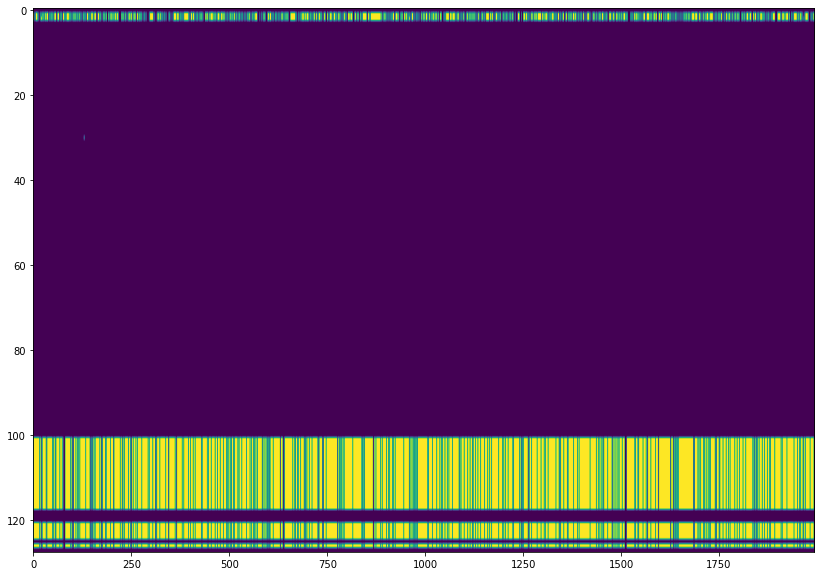

In [94]:
plt.figure(figsize=(14,10))
plt.imshow(crime_data.isna().T, aspect="auto")
plt.show()

Jesus hell!

,@attribute state numeric,@attribute communityname string,@attribute fold numeric,@attribute population numeric,@attribute householdsize numeric,@attribute racepctblack numeric,@attribute racePctWhite numeric,@attribute racePctAsian numeric,@attribute racePctHisp numeric,@attribute agePct12t21 numeric,...,@attribute PctForeignBorn numeric,@attribute PctBornSameState numeric,@attribute PctSameHouse85 numeric,@attribute PctSameCity85 numeric,@attribute PctSameState85 numeric,@attribute LandArea numeric,@attribute PopDens numeric,@attribute PctUsePubTrans numeric,@attribute LemasPctOfficDrugUn numeric,@attribute ViolentCrimesPerPop numeric
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
6,44,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,0.02,0.30,...,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.00,0.03
12,25,Needhamtown,1,0.03,0.47,0.01,0.96,0.13,0.02,0.29,...,0.22,0.66,0.82,0.66,0.73,0.03,0.18,0.59,0.00,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,9,Southingtontown,10,0.05,0.52,0.02,0.97,0.04,0.02,0.40,...,0.18,0.72,0.77,0.83,0.85,0.10,0.09,0.03,0.00,0.02
1987,44,Burrillvilletown,10,0.01,0.65,0.00,1.00,0.01,0.01,0.40,...,0.06,0.77,0.65,0.84,0.71,0.16,0.02,0.02,0.00,0.04
1991,9,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1992,25,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013 entries, 0 to 1993
Columns: 104 entries, @attribute state numeric to @attribute ViolentCrimesPerPop numeric
dtypes: float64(101), int64(2), object(1)
memory usage: 831.0+ KB


None

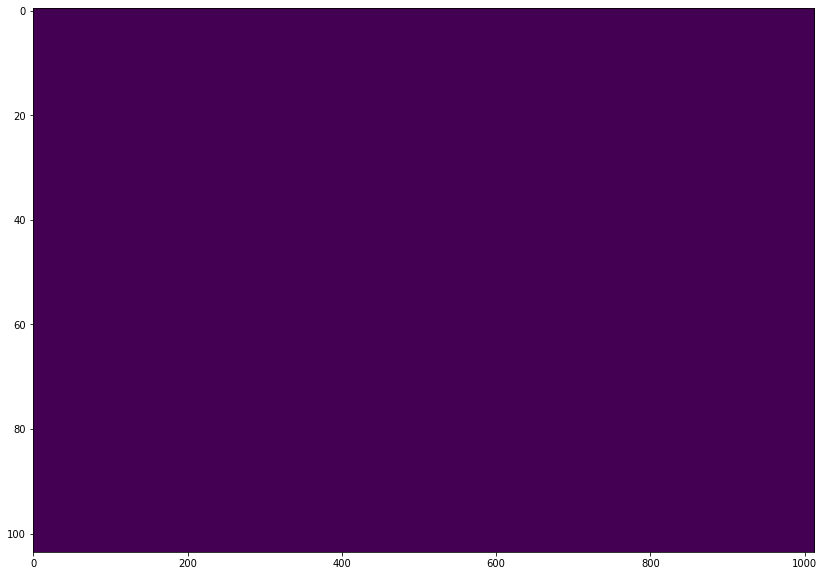

In [95]:
keep_rows = crime_data.isna().sum(1)[crime_data.isna().sum(1) < 24].index.values

crime_data_filtered = crime_data[crime_data.index.isin(keep_rows)].dropna(axis="columns", inplace=False)

display(crime_data_filtered)
display(crime_data_filtered.info())

plt.figure(figsize=(14,10))
plt.imshow(crime_data_filtered.isna().T, aspect="auto")
plt.show()

Now I just need to swap community names with numbers, and all data is gonna be numeric

In [96]:
com_names = pd.unique(crime_data_filtered["@attribute communityname string"].values)
display(len(com_names))
com_replace = np.arange(len(com_names))
dict_com_rep = dict(zip(com_names,com_replace))
crime_data_filtered["@attribute communityname string"] = crime_data_filtered["@attribute communityname string"].replace(list(dict_com_rep.keys()), list(dict_com_rep.values()))
display(crime_data_filtered)

969

,@attribute state numeric,@attribute communityname string,@attribute fold numeric,@attribute population numeric,@attribute householdsize numeric,@attribute racepctblack numeric,@attribute racePctWhite numeric,@attribute racePctAsian numeric,@attribute racePctHisp numeric,@attribute agePct12t21 numeric,...,@attribute PctForeignBorn numeric,@attribute PctBornSameState numeric,@attribute PctSameHouse85 numeric,@attribute PctSameCity85 numeric,@attribute PctSameState85 numeric,@attribute LandArea numeric,@attribute PopDens numeric,@attribute PctUsePubTrans numeric,@attribute LemasPctOfficDrugUn numeric,@attribute ViolentCrimesPerPop numeric
0,8,0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
3,34,1,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,2,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
6,44,3,1,0.01,0.39,0.00,0.98,0.06,0.02,0.30,...,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.00,0.03
12,25,4,1,0.03,0.47,0.01,0.96,0.13,0.02,0.29,...,0.22,0.66,0.82,0.66,0.73,0.03,0.18,0.59,0.00,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,9,964,10,0.05,0.52,0.02,0.97,0.04,0.02,0.40,...,0.18,0.72,0.77,0.83,0.85,0.10,0.09,0.03,0.00,0.02
1987,44,965,10,0.01,0.65,0.00,1.00,0.01,0.01,0.40,...,0.06,0.77,0.65,0.84,0.71,0.16,0.02,0.02,0.00,0.04
1991,9,966,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1992,25,967,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


In [105]:
crime_data_filtered_X = crime_data_filtered[crime_data_filtered.columns[:-1]]
crime_data_filtered_Y = crime_data_filtered[crime_data_filtered.columns[-1]]

In [112]:
from sklearn.metrics import r2_score

In [137]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
r2_scores = []


kf = KFold(n_splits=5)
for train_index, test_index in kf.split(crime_data_filtered_X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = crime_data_filtered_X.values[train_index], crime_data_filtered_X.values[test_index]
    Y_train, Y_test = crime_data_filtered_Y.values[train_index], crime_data_filtered_Y.values[test_index]
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,Y_train)
    Y_pred = lin_reg.predict(X_test)
    r2_scores.append(r2_score(Y_test,Y_pred))
    
display(r2_scores)
print("Average of R^2 scores:\t\t\t{0:.4f}\nStandard Deviation of R^2 scores:\t{1:.4f}\n".format(np.mean(r2_scores),np.var(r2_scores)**(1/2)))

[0.7277648148394336,
 0.6880387527191238,
 0.7541827646550497,
 0.7354506262942354,
 0.7430054222028031]

Average of R^2 scores:			0.7297
Standard Deviation of R^2 scores:	0.0226



In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [160]:
parameters = {'alpha': np.linspace(0.001,0.1,100) , 'normalize' : [True,False], 'max_iter': np.linspace(200,5000,100)}

lasso = Lasso()

clf = GridSearchCV(lasso, parameters, cv=kf)
clf.fit(crime_data_filtered_X,crime_data_filtered_Y)

E:\ANACONDA\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012232447246487865, tolerance: 0.004818141000000001
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Lasso(),
             param_grid={'alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.0...
       3884.84848485, 3933.33333333, 3981.81818182, 4030.3030303 ,
       4078.78787879, 4127.27272727, 4175.75757576, 4224.24242424,
       4272.72727273, 4321.21212121, 4369.6969697 , 4418.18181818,
       4466.66666667, 4515.15151515, 4563.63636364, 4612.12121212,
       4660.60606061, 4709.09090909, 4757.57575758, 4806.06060606,
       4854.54545455, 4903.03030303, 4951.51515152, 5000.        ]),
                         'normalize': [True, False]})

In [161]:
bestest = clf.best_estimator_
display(bestest)

Lasso(alpha=0.001, max_iter=200.0)

normalize='deprecated'... GOOD!

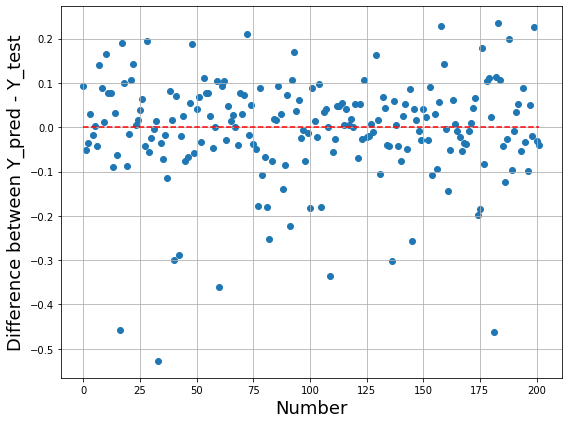

In [162]:
y_pred = bestest.predict(X_test)

fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(np.arange(len(y_pred)), y_pred - Y_test)
ax.plot(np.arange(len(y_pred)),np.zeros(len(y_pred)), "--r")
ax.set_xlabel("Number", fontsize=18)
ax.set_ylabel("Difference between Y_pred - Y_test", fontsize=18)


ax.grid()
fig.tight_layout()
plt.show()

It doesn't seem like there is a systematic error.

## 3. Shrinkage

* interpret Lasso models based on its descriptive parameters by the shrinkage method described during the lecture (make a plot and check the names of the features that are not eliminated by the penalty parameter) on the data we have here [ this is an explanatory data analysis problem, try to be creative ]

* fit Ridge models and apply the shrinkage method as well, did you get what you expect?

* do you think normalization is needed here? if so, do not forget to use it in the next tasks



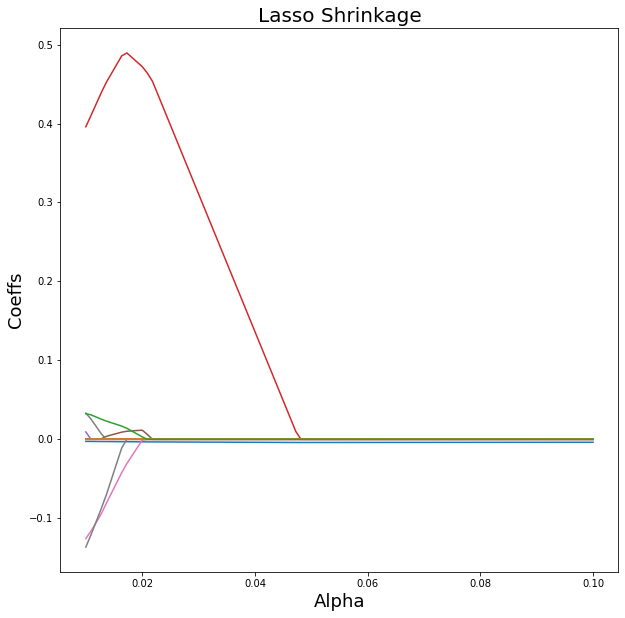

In [174]:
all_coeffs = []
alphas = []

#split
X_train, X_test, Y_train, Y_test = train_test_split(crime_data_filtered[crime_data_filtered.columns[:-1]],
                                                    crime_data_filtered[crime_data_filtered.columns[-1]],
                                                    train_size=0.8)

for a in np.linspace(0.01, 0.1, 100):
    alphas.append(a)
    r = Lasso(alpha=a)
    r.fit(X_train, Y_train)
    all_coeffs.append(r.coef_)
    
all_coeffs = np.array(all_coeffs)

plt.figure(figsize=(10,10))
plt.plot(alphas, all_coeffs)
plt.title("Lasso Shrinkage", fontsize=20)
plt.xlabel("Alpha", fontsize=18)
plt.ylabel("Coeffs", fontsize=18)
plt.show()

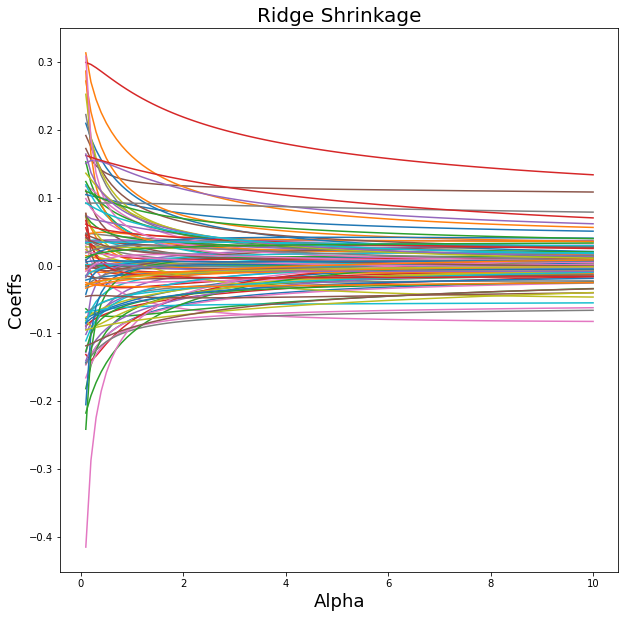

In [175]:
all_coeffs = []
alphas = []

#split
X_train, X_test, Y_train, Y_test = train_test_split(crime_data_filtered[crime_data_filtered.columns[:-1]],
                                                    crime_data_filtered[crime_data_filtered.columns[-1]],
                                                    train_size=0.8)

for a in np.linspace(0.1, 10, 100):
    alphas.append(a)
    r = Ridge(alpha=a)
    r.fit(X_train, Y_train)
    all_coeffs.append(r.coef_)
    
all_coeffs = np.array(all_coeffs)

plt.figure(figsize=(10,10))
plt.plot(alphas, all_coeffs)
plt.title("Ridge Shrinkage", fontsize=20)
plt.xlabel("Alpha", fontsize=18)
plt.ylabel("Coeffs", fontsize=18)
plt.show()

So it seems like Lasso eliminates values heavily, while Ridge tries to use all of them. It seems like its because to linearity of the two methods: Lasso has L1 while Ridge has L2 and calculates with the least squares method. Lassos optimization objective also comes with sample size, while Ridge seems to be independent of it.

<font size="4"> Is normalization needed? </font>

No. (its already normalized and the source also says this)

## 4. Subset selection

* Split the data to training and test sets and do recursice feature elimination until 10 remaining predictors with 5-fold cross-validated regressors (RidgeCV, LassoCV, ElasticNetCV) on the training set, plot their names and look up some of their meanings [ recursive feature elimination is part of sklearn but you can do it with a for loop if you whish ] 

* Do all models provide the same descriptors? Check their performance on the test set! Plot all model predictions compared to the y_test on 3 different plots, which model seems to be the best?



In [182]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

from sklearn.feature_selection import RFE as RFE
from sklearn.linear_model import RidgeCV as RCV, LassoCV as LCV, ElasticNetCV as ECV   
#the is the most obstructive thing I have ever done

In [191]:
#split
X_train, X_test, Y_train, Y_test = train_test_split(crime_data_filtered[crime_data_filtered.columns[:-1]],
                                                    crime_data_filtered[crime_data_filtered.columns[-1]],
                                                    train_size=0.8)

LCV_e = LCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=5)
RCV_e = RCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=5)
ECV_e = ECV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=5)

LCV_selector = RFE(LCV_e, n_features_to_select=10)
RCV_selector = RFE(RCV_e, n_features_to_select=10)
ECV_selector = RFE(ECV_e, n_features_to_select=10)

LCV_selector.fit(X_train,Y_train)
RCV_selector.fit(X_train,Y_train)
ECV_selector.fit(X_train,Y_train)

RFE(estimator=ElasticNetCV(alphas=[0.001, 0.01, 0.1, 1], cv=5),
    n_features_to_select=10)

In [200]:
for i in range(10):
    print(crime_data_filtered.columns[:-1][LCV_selector.support_][i], "\t\t", LCV_selector.estimator_.coef_[i])
print("\n")
for i in range(10):
    print(crime_data_filtered.columns[:-1][RCV_selector.support_][i], "\t\t", RCV_selector.estimator_.coef_[i])
print("\n")
for i in range(10):
    print(crime_data_filtered.columns[:-1][ECV_selector.support_][i], "\t\t", ECV_selector.estimator_.coef_[i])

@attribute racePctWhite numeric 		 -0.19607848950470735
@attribute pctWPubAsst numeric 		 0.08612077832211569
@attribute PctUnemployed numeric 		 0.10770121556767476
@attribute PctEmplManu numeric 		 -0.05238297817010141
@attribute MalePctDivorce numeric 		 0.07819079325889156
@attribute PctIlleg numeric 		 0.37002983267353995
@attribute PctPersDenseHous numeric 		 0.03079152324962493
@attribute HousVacant numeric 		 0.12476130557867923
@attribute NumStreet numeric 		 0.1454022130824553
@attribute LemasPctOfficDrugUn numeric 		 0.049824205159632144


@attribute racePctWhite numeric 		 -0.21081405421412294
@attribute pctWWage numeric 		 -0.22052322194951368
@attribute PctLess9thGrade numeric 		 -0.17752800180693026
@attribute MalePctDivorce numeric 		 0.19968585631096458
@attribute PctIlleg numeric 		 0.42344114344323186
@attribute PersPerOwnOccHous numeric 		 0.10281144739192358
@attribute PctPersDenseHous numeric 		 0.20758951208752116
@attribute RentLowQ numeric 		 -0.152003631440193

There are multiple overlapping features that got choosen as the most impactful. Like the "racepctblack", which says the percantage of african american people being present in the community. All estimators gave a value higher then 0 which means that the crime level increases with black people percentage. The other two most import ones are the percentage of white people present in the community, but it's inversely proportional to crime. But whatabout PctIlleg? PctIlleg is "percentage of kids born to never married", which always got choosen as the most impactful parameter. Marry kids!

## 5. ElasticNet penalty surface
* visualize the surface of the `objective(alpha, beta)`

 * parameters corresponding to the L1 and L2 regularizations. Select the best possible combination of the hyper-parameters that minimize the objective (clue: from scipy.optimize import minimize)

* this task is similar to what you've seen during class, just not for MSE vs. single penalty parameter but MSE vs. two penalty parameters `alpha, beta`

* interpret the overall results, do you think regularization is necessary at all? do you think linear models are powerful enough on this dataset?

In [203]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error as MSE
from scipy.optimize import minimize

In [241]:
def elasticnet_to_minimaze(a,b):
    #data is burnt in
    X_train, X_test, Y_train, Y_test = train_test_split(crime_data_filtered[crime_data_filtered.columns[:-1]],
                                                    crime_data_filtered[crime_data_filtered.columns[-1]],
                                                    train_size=0.8, random_state=117)
    Alpha = a+b
    Ratio = a / (a+b)
    ela = ElasticNet(alpha = Alpha, l1_ratio = float(Ratio), random_state=2)
    ela.fit(X_train, Y_train)
    Y_pred = ela.predict(X_train)    
    return MSE(Y_train, Y_pred)

In [252]:
res = minimize(elasticnet_to_minimaze, x0=1, args=(0.3), bounds=[(0,1)])

In [253]:
res

      fun: 0.06356572772284819
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.61790588e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 4
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.99997382])

I don't now if this the good interpretation, but it seems like tis not heading anywhere.